## Section -1 Global Inflation and Crude Oil Prices

###### Requirements (Libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Global Oil Price Data

In [2]:
## Importing  - Global oil_price Data -(2016 -2025)

df_oil_price = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Phase_2/Global oil_price2016 -2025.csv")

In [3]:
df_oil_price.head()

,Month,Year,Brent Crude,WTI (Global Proxy)
0,January,2016,30.70,31.68
1,February,2016,32.18,30.32
2,March,2016,38.21,37.55
3,April,2016,41.58,40.75
4,May,2016,46.74,46.71


In [4]:
df_oil_price.shape

(116, 4)

In [5]:
df_oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               116 non-null    object 
 1   Year                116 non-null    int64  
 2   Brent Crude         116 non-null    float64
 3   WTI (Global Proxy)  116 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ KB


In [6]:
df_oil_price.describe()

,Year,Brent Crude,WTI (Global Proxy)
count,116.000000,116.000000,116.000000
mean,2020.344828,68.050000,63.745776
std,2.807144,19.074893,17.683263
min,2016.000000,18.380000,16.550000
25%,2018.000000,54.797500,50.930000
50%,2020.000000,68.805000,63.780000
75%,2023.000000,80.180000,75.310000
max,2025.000000,122.710000,115.310000


In [7]:
df_oil_price.isnull().sum()

Month                 0
Year                  0
Brent Crude           0
WTI (Global Proxy)    0
dtype: int64

In [8]:
## Creating Column Month_Year Combined

# Combine Month and Year as a string
df_oil_price['Month_Year'] = df_oil_price['Month'] + ' ' + df_oil_price['Year'].astype(str)

# Example output:
# January 2022, February 2022, etc.
print(df_oil_price[['Month', 'Year', 'Month_Year']].head())
# Check result
df_oil_price.head()



      Month  Year     Month_Year
0   January  2016   January 2016
1  February  2016  February 2016
2     March  2016     March 2016
3     April  2016     April 2016
4       May  2016       May 2016


,Month,Year,Brent Crude,WTI (Global Proxy),Month_Year
0,January,2016,30.70,31.68,January 2016
1,February,2016,32.18,30.32,February 2016
2,March,2016,38.21,37.55,March 2016
3,April,2016,41.58,40.75,April 2016
4,May,2016,46.74,46.71,May 2016


#### Column chart for global oil Price

Text(0, 0.5, 'Price (USD per barrel)')

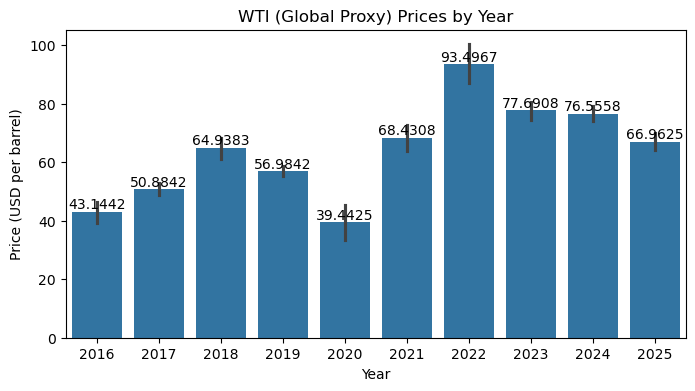

In [9]:

plt.figure(figsize=(8,4))
ax =sns.barplot(data=df_oil_price,x='Year',y='WTI (Global Proxy)')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("WTI (Global Proxy) Prices by Year")
plt.xlabel("Year")
plt.ylabel("Price (USD per barrel)")



#### Column chart for global oil  and USA Brent Crude Oil Price

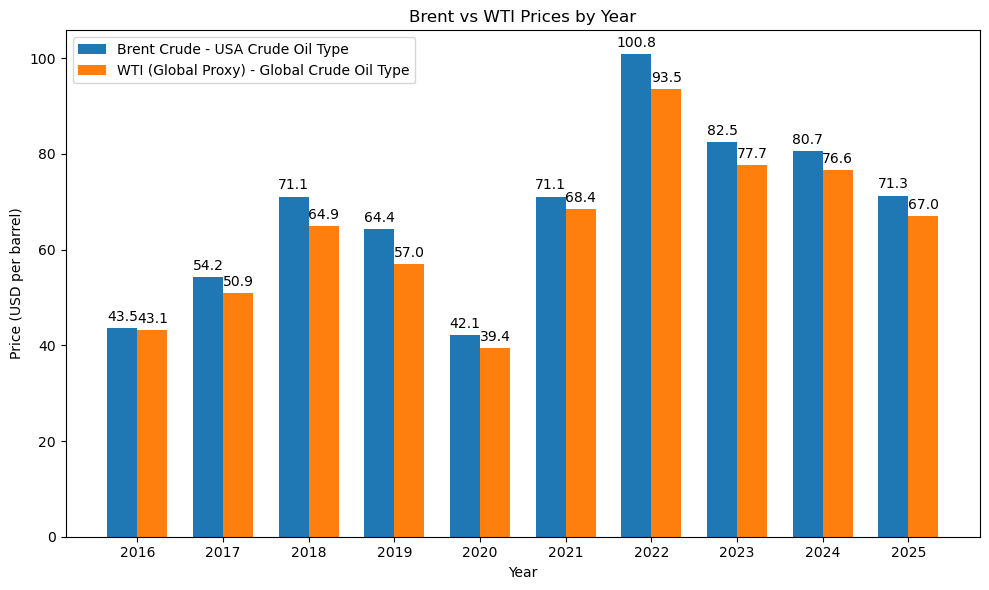

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
years = df_oil_price['Year'].unique()
brent = df_oil_price.groupby('Year')['Brent Crude'].mean()
wti = df_oil_price.groupby('Year')['WTI (Global Proxy)'].mean()

x = np.arange(len(years))  # the label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, brent, width, label='Brent Crude - USA Crude Oil Type')
rects2 = ax.bar(x + width/2, wti, width, label='WTI (Global Proxy) - Global Crude Oil Type')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD per barrel)')
ax.set_title('Brent vs WTI Prices by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()


# Add value labels on top
for rects in [rects1, rects2]:  # Loop through two sets of bars
    for rect in rects:           # Loop through each individual bar
        height = rect.get_height()   # Get the height of the bar
        ax.annotate(f'{height:.1f}',  # Annotate with height rounded to 1 decimal
                    xy=(rect.get_x() + rect.get_width() / 2, height),  # Position at top center of bar
                    xytext=(0,3),          # Offset text by 3 points vertically
                    textcoords="offset points",
                    ha='center',          # Horizontal alignment centered
                    va='bottom')          # Vertical alignment at bottom of text

plt.tight_layout()
plt.show()


##### Final Plot for Golbal Oil Price and USA Oil Price from 2016 to 2022

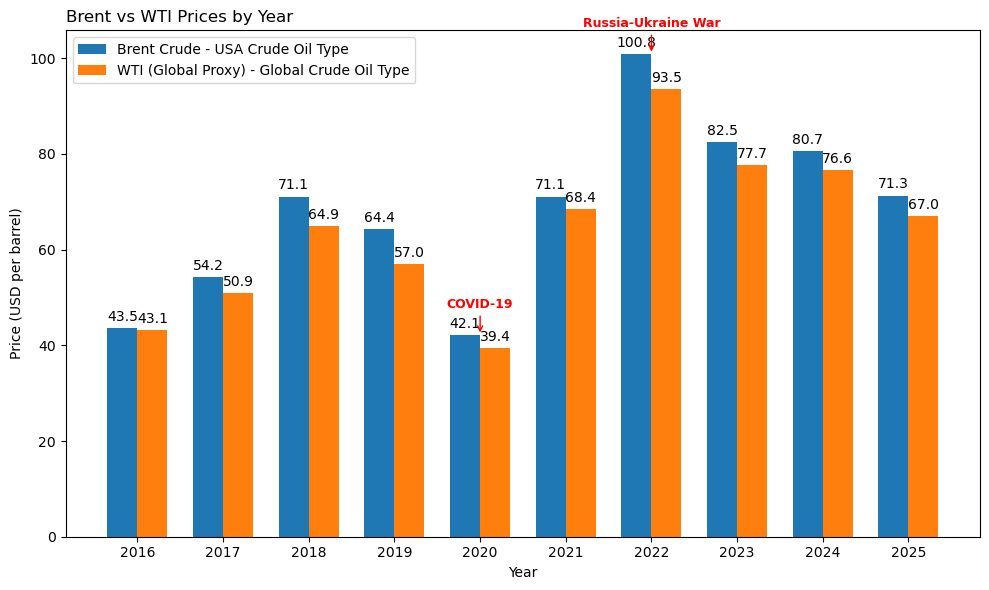

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
years = df_oil_price['Year'].unique()
brent = df_oil_price.groupby('Year')['Brent Crude'].mean()
wti = df_oil_price.groupby('Year')['WTI (Global Proxy)'].mean()

x = np.arange(len(years))  # the label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, brent, width, label='Brent Crude - USA Crude Oil Type')
rects2 = ax.bar(x + width/2, wti, width, label='WTI (Global Proxy) - Global Crude Oil Type')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD per barrel)')
ax.set_title('Brent vs WTI Prices by Year',loc='left')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Add value labels on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# === Add special event markers ===
events = {
    2020: "COVID-19",
    2022: "Russia-Ukraine War"
}

# Convert NumPy array to list for indexing
years_list = years.tolist()

for year, label in events.items():
    if year in years_list:
        xpos = years_list.index(year)   # x position for this year
        ymax = max(brent.loc[year], wti.loc[year])  # highest bar for this year

        # Place annotation above bar (with extra padding)
        ax.annotate(label,
                    xy=(xpos, ymax),              # point to top of tallest bar
                    xytext=(0, 20),               # shift text 20 points above
                    textcoords="offset points",   # interpret xytext as offset
                    ha='center', color='red',
                    fontsize=9, fontweight='bold',
                    arrowprops=dict(arrowstyle="->", color='red'))

plt.tight_layout()
plt.show()


The data shows that crude oil prices **dropped in 2020** due to the COVID-19 lockdowns,  
**recovered in 2021**, spiked sharply in **2022 with the Russia-Ukraine war**,  
and then **stabilized again by 2025**.


#### Now Analysing and Comparing  Global  and Oil Importing Countries   - Inflation Rate

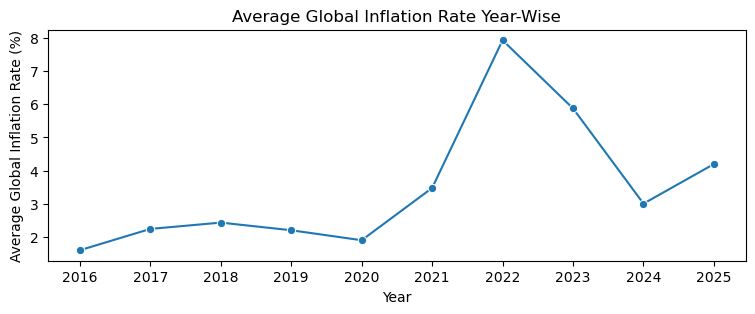

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_global_Inflation = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Phase_2/Global_inflation_rate_yeawise_2016-2025.csv")

plt.figure(figsize=(9, 3))

# Plot with markers
sns.lineplot(
    data=df_global_Inflation,
    x="Year",
    y="Average Global Inflation Rate (%)",
    marker="o"
    
    
)

# Show all years on x-axis
plt.xticks(df_global_Inflation["Year"])  # Force all years to appear

plt.title("Average Global Inflation Rate Year-Wise")
plt.show()



### Country wise Inflation

In [13]:
df_Countries_inflation = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Phase_2/inflation_rates_oil_importing_countries_2016_2025.csv")

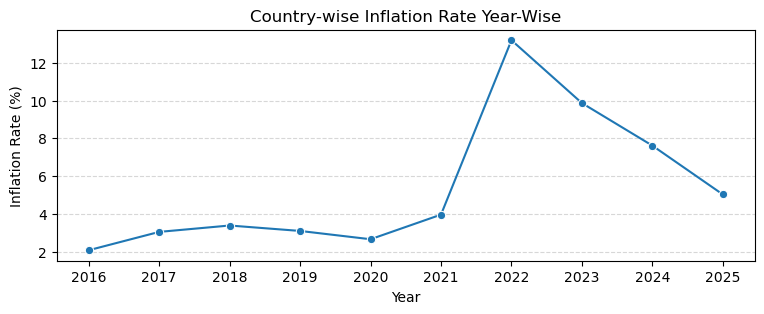

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

country_avg = df_Countries_inflation.groupby(["Country Name","Year"])['Inflation Rate (%)'].mean().reset_index().sort_values("Year")

plt.figure(figsize=(9, 3))

# Plot with markers and no shaded area
sns.lineplot(
    data=country_avg,
    x="Year",
    y="Inflation Rate (%)",
    marker="o",        # Adds markers
    errorbar=None       # Removes shaded confidence interval
)

# Show all years on x-axis
plt.xticks(sorted(country_avg["Year"].unique()))

# Add title and labels
plt.title("Country-wise Inflation Rate Year-Wise", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")

# Optional: grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


lIne Chart for Comparing Inflation   of india only

In [15]:
df_Countries_inflation.columns

Index(['Country Name', 'Month', 'Year', 'Inflation Rate (%)'], dtype='object')

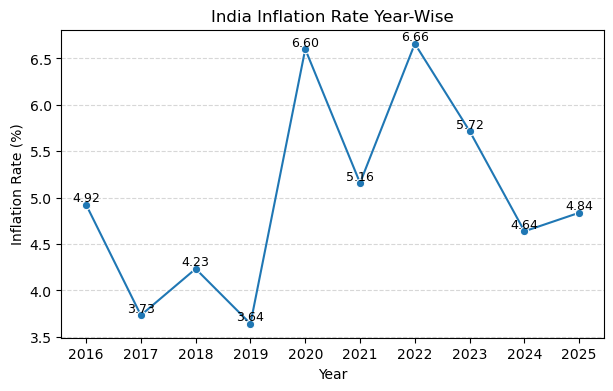

In [16]:

# Filter only India
india_data = df_Countries_inflation.groupby(["Country Name","Year"], as_index=False)['Inflation Rate (%)'].mean()
india_data = india_data[india_data["Country Name"] == "India"]

plt.figure(figsize=(7, 4))

# Plot line chart with markers
ax = sns.lineplot(
    data=india_data,
    x="Year",
    y="Inflation Rate (%)",
    marker="o",
    errorbar=None   # removes shaded confidence interval
)

# Annotate values above each marker
for x, y in zip(india_data["Year"], india_data["Inflation Rate (%)"]):
    ax.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

# Show all years on x-axis
plt.xticks(india_data["Year"])

# Titles and labels
plt.title("India Inflation Rate Year-Wise", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")

# Optional: grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [17]:
india_data.shape

(10, 3)

Merging or joining the oil price and inflation data


In [18]:
grouped_oil_by_year = df_oil_price.groupby("Year",as_index=False)[["WTI (Global Proxy)","Brent Crude"]].mean()

grouped_oil_by_year

,Year,WTI (Global Proxy),Brent Crude
0,2016,43.144167,43.548333
1,2017,50.884167,54.247500
2,2018,64.938333,71.060833
3,2019,56.984167,64.358333
4,2020,39.442500,42.094167
5,2021,68.430833,71.069167
6,2022,93.496667,100.777500
7,2023,77.690833,82.468333
8,2024,76.555833,80.661667
9,2025,66.962500,71.296250


In [19]:
india_data.columns

Index(['Country Name', 'Year', 'Inflation Rate (%)'], dtype='object')

In [20]:
df_global_Inflation.columns

Index(['Year', 'Average Global Inflation Rate (%)'], dtype='object')

You have three datasets now:

grouped_oil_by_year → columns: Year, WTI (Global Proxy), Brent Crude

india_data → columns: Country Name, Year, Inflation Rate (%) (filtered for India)

df_global_Inflation → columns: Year, Average Global Inflation Rate (%)

We can merge all three on the Year column and then compute a correlation matrix and a heatmap. Here’s a clean step-by-step way:

In [21]:
import pandas as pd

# Merge oil prices with global inflation
merged_df = pd.merge(df_global_Inflation, grouped_oil_by_year, on="Year", how="left")

# Merge India inflation
merged_df = pd.merge(merged_df, india_data[["Year","Inflation Rate (%)"]], on="Year", how="left")

# Rename columns for clarity
merged_df.rename(columns={
    "Average Global Inflation Rate (%)": "Global_Inflation",
    "Inflation Rate (%)": "India_Inflation",
    "WTI (Global Proxy)": "WTI - Global Oil Price",
    "Brent Crude": "Brent - USA Oil Price"
}, inplace=True)

merged_df


,Year,Global_Inflation,WTI - Global Oil Price,Brent - USA Oil Price,India_Inflation
0,2016,1.61,43.144167,43.548333,4.925000
1,2017,2.25,50.884167,54.247500,3.733333
2,2018,2.44,64.938333,71.060833,4.233333
3,2019,2.21,56.984167,64.358333,3.641667
4,2020,1.91,39.442500,42.094167,6.600000
5,2021,3.48,68.430833,71.069167,5.158333
6,2022,7.92,93.496667,100.777500,6.658333
7,2023,5.87,77.690833,82.468333,5.716667
8,2024,3.01,76.555833,80.661667,4.637500
9,2025,4.20,66.962500,71.296250,4.837500


In [22]:
Phase_1_df =merged_df

Now We Have Final Prepared Dataset For Phase 1 Analysis

Step 1: Split the data into two sub-periods

In [23]:
# Phase 1: 2016-2021
phase1_pre_war = Phase_1_df[Phase_1_df['Year'] <= 2021]

# Phase 2: 2022-2025
phase1_post_war = Phase_1_df[Phase_1_df['Year'] >= 2022]




### Global oil prices vs Global Inflation  2022 -2025

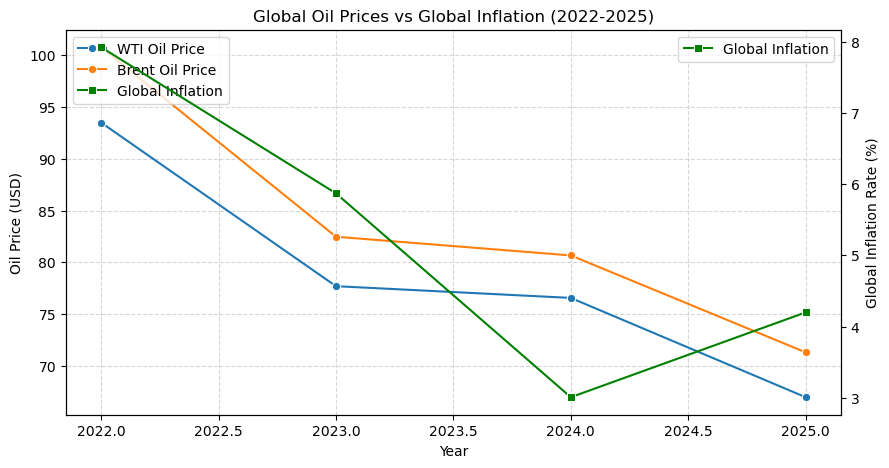

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data if needed
data_post_war = Phase_1_df[Phase_1_df['Year'] >= 2022]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot WTI Oil Price
sns.lineplot(data=data_post_war, x="Year", y="WTI - Global Oil Price", marker="o", label="WTI Oil Price", ax=ax1)
# Plot Brent Oil Price
sns.lineplot(data=data_post_war, x="Year", y="Brent - USA Oil Price", marker="o", label="Brent Oil Price", ax=ax1)

ax1.set_ylabel("Oil Price (USD)")
ax1.set_xlabel("Year")
ax1.grid(True, linestyle='--', alpha=0.5)

# Secondary axis for Global Inflation
ax2 = ax1.twinx()
sns.lineplot(data=data_post_war, x="Year", y="Global_Inflation", marker="s", color="green", label="Global Inflation", ax=ax2)
ax2.set_ylabel("Global Inflation Rate (%)")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Global Oil Prices vs Global Inflation (2022-2025)")
plt.show()


### Global oil prices vs Global Inflation and India Inflation  2016 -2025

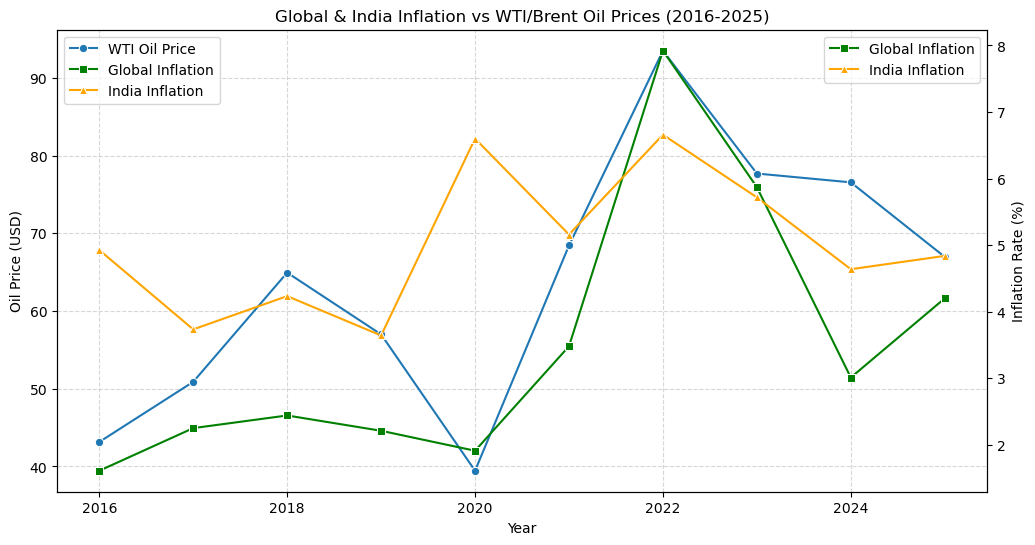

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 2016-2025
data_full = Phase_1_df

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot WTI and Brent Oil Prices on primary axis
sns.lineplot(data=data_full, x="Year", y="WTI - Global Oil Price", marker="o", label="WTI Oil Price", ax=ax1)

ax1.set_ylabel("Oil Price (USD)")
ax1.set_xlabel("Year")
ax1.grid(True, linestyle='--', alpha=0.5)

# Create secondary axis for Global and India Inflation
ax2 = ax1.twinx()
sns.lineplot(data=data_full, x="Year", y="Global_Inflation", marker="s", color="green", label="Global Inflation", ax=ax2)
sns.lineplot(data=data_full, x="Year", y="India_Inflation", marker="^", color="orange", label="India Inflation", ax=ax2)
ax2.set_ylabel("Inflation Rate (%)")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Global & India Inflation vs WTI/Brent Oil Prices (2016-2025)")
plt.show()


COVID-19 lockdowns crashed demand, causing oil prices to plummet. The Russia-Ukraine war then triggered a price spike as Russia, a major producer, was excluded from key markets, shifting demand to OPEC and US oil and creating a supply crunch. This directly fueled the subsequent surge in global  oil price hike and thus global inflation.

Step 3: Correlation Analysis

Correlation between India Inflation, Global Inflation, WTI, Brent

Since 2022 to 2025 data is valueblr so i will take only that period data

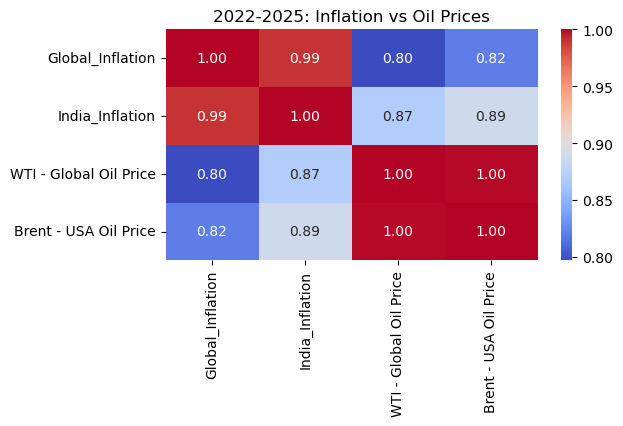

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
corr_cols = ['Global_Inflation','India_Inflation','WTI - Global Oil Price','Brent - USA Oil Price']

# Filter for 2022-2025
phase_post_war = Phase_1_df[Phase_1_df['Year'] >= 2022]

# Compute correlation
corr_post_war = phase_post_war[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,3))
sns.heatmap(corr_post_war, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2022-2025: Inflation vs Oil Prices")
plt.show()


#### GLobal Inflation vs Global Oil Price Correlation Matrix - ()

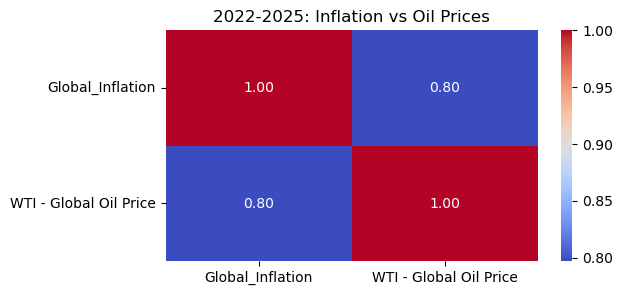

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
corr_cols = ['Global_Inflation','WTI - Global Oil Price']

# Filter for 2022-2025
phase_post_war = Phase_1_df[Phase_1_df['Year'] >= 2022]

# Compute correlation
corr_post_war = phase_post_war[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,3))
sns.heatmap(corr_post_war, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2022-2025: Inflation vs Oil Prices")
plt.show()